# Shot on Goals! 

In this notebook, we aim to analyze shot on goals from throw-ins. We find how many throw-ins leaad to a shot on goal and try our best to analyze the data!

In [2]:
# import libraries
from statsbombpy import sb
import json
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [6]:
# obtaining the csv file with the event data from all matches
# creating a dataframe with this data
df_allData = pd.read_csv('full_data_sorted.csv')
df_allData

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_76453/3959350156.py:3: DtypeWarning: Columns (2,4,12,26,35,43,49,69,85,86,87,88,89,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df_allData = pd.read_csv('/Users/rachelyang/Documents/GitHub/StatsBomb/full_data_sorted.csv')


,Unnamed: 0,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_saved_to_post,shot_redirect,pass_straight,goalkeeper_shot_saved_off_target,shot_saved_off_target,shot_follows_dribble,dribble_no_touch,goalkeeper_penalty_saved_to_post,goalkeeper_success_in_play,player_off_permanent
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192690,4814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192691,4715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192692,4815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192693,4983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_throwIn = df_allData.loc[df_allData['play_pattern'] == 'From Throw In']
df_throwIn

,Unnamed: 0,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_saved_to_post,shot_redirect,pass_straight,goalkeeper_shot_saved_off_target,shot_saved_off_target,shot_follows_dribble,dribble_no_touch,goalkeeper_penalty_saved_to_post,goalkeeper_success_in_play,player_off_permanent
12,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2088,NaN,NaN,NaN,NaN,"[3.3, 12.7]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192565,2803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192566,4023,NaN,NaN,NaN,NaN,"[70.4, 28.6]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192567,4633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192585,1419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# number of shots from throw-ins
throw_shots = []
throw_shots_count = 0
for row in df_throwIn.index:
    if (df_throwIn["type"][row]=="Shot"):
        throw_shots.append("Success")
        throw_shots_count+=1
    else:
        throw_shots.append("Failure")
print(throw_shots_count)
df_shot= df_throwIn.assign(throwIn_to_shot=throw_shots)
df_shot

230


,Unnamed: 0,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_redirect,pass_straight,goalkeeper_shot_saved_off_target,shot_saved_off_target,shot_follows_dribble,dribble_no_touch,goalkeeper_penalty_saved_to_post,goalkeeper_success_in_play,player_off_permanent,throwIn_to_shot
12,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Failure
13,1067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Failure
14,2088,NaN,NaN,NaN,NaN,"[3.3, 12.7]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Failure
15,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Failure
16,1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192565,2803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Failure
192566,4023,NaN,NaN,NaN,NaN,"[70.4, 28.6]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Failure
192567,4633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Failure
192585,1419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Failure


In [9]:
# counting how many shots there are 
shot_count = 0
for row in df_allData.index:
    if df_allData["type"][row] == "Shot":
        shot_count +=1
print(shot_count)

1289


We see that there are 1289 shots on goal and 230 of them were from a throw-in play.

In [10]:
# locations of all shots from throw-ins
shot_sucess = []
for row in df_throwIn.index:
    if df_shot['throwIn_to_shot'][row]=="Success":
        df_shot["location"][row] = json.loads(df_shot["location"][row])
        shot_sucess.append([df_shot["location"][row]])
print(shot_sucess)
print(len(shot_sucess))

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_76453/2086793985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot["location"][row] = json.loads(df_shot["location"][row])


[[[114.6, 50.1]], [[108.2, 27.3]], [[97.1, 44.3]], [[94.1, 45.4]], [[110.8, 47.8]], [[100.0, 29.7]], [[96.3, 50.0]], [[103.5, 48.4]], [[108.1, 31.1]], [[106.5, 29.8]], [[113.6, 36.1]], [[99.0, 56.5]], [[94.4, 38.6]], [[96.6, 35.6]], [[95.4, 48.0]], [[108.8, 30.8]], [[108.8, 21.0]], [[115.3, 42.4]], [[111.2, 30.7]], [[116.2, 41.4]], [[119.0, 40.9]], [[95.7, 50.0]], [[100.0, 55.9]], [[101.5, 57.7]], [[93.2, 35.6]], [[103.7, 52.0]], [[112.2, 50.9]], [[114.6, 32.8]], [[106.5, 53.3]], [[92.6, 20.3]], [[96.5, 43.7]], [[117.3, 50.6]], [[103.7, 22.2]], [[101.6, 58.0]], [[110.9, 44.9]], [[105.8, 34.0]], [[104.3, 42.0]], [[92.2, 47.8]], [[103.8, 18.9]], [[102.6, 55.6]], [[114.2, 39.3]], [[114.0, 36.3]], [[110.3, 56.0]], [[102.5, 47.8]], [[89.3, 38.6]], [[99.9, 24.3]], [[101.7, 52.7]], [[104.1, 29.3]], [[98.7, 38.2]], [[86.1, 38.6]], [[113.4, 59.1]], [[103.8, 54.7]], [[98.7, 42.0]], [[100.0, 43.0]], [[95.4, 35.7]], [[103.6, 21.9]], [[107.1, 48.2]], [[101.9, 32.9]], [[117.1, 46.6]], [[89.9, 42.1]]

### Visualizing our Data

Text(0.5, 1.0, 'Shots on Goal from Throw-in')

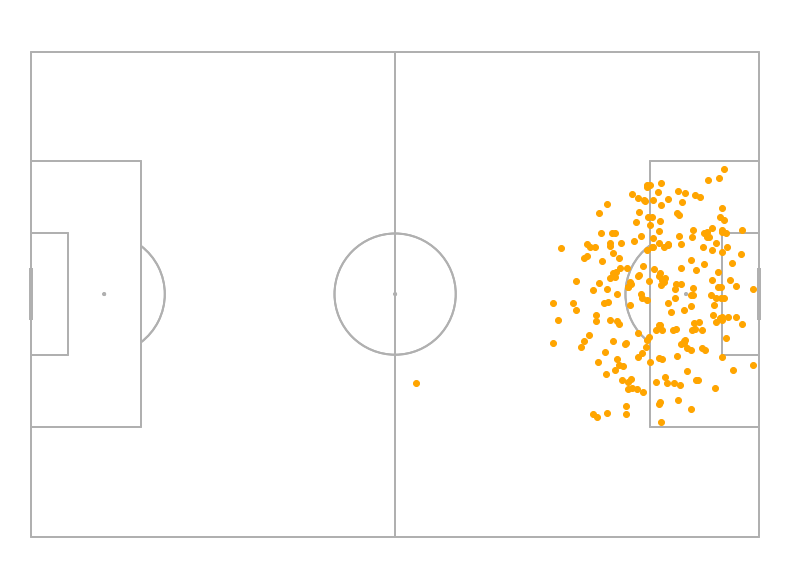

In [11]:
# graphing unsucessful first contact throw ins

## set up pitch
p = Pitch(pitch_type='statsbomb')
fig, ax = p.draw(figsize=(12,8))

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
p.draw(ax=ax)
plt.gca().invert_yaxis() 

# for loc in no_firstContact:
#     p.scatter(loc[0][0], loc[0][1], c='orange', s=80, ec='k', ax=ax)

for loc in shot_sucess:
    # p.plot((loc[0][0], loc[0][1]), color='orange', ax=ax)
    p.scatter((loc[0][0]),(loc[0][1]), color='orange', ax=ax)
    
# for start_loc, end_loc in zip(start_location_list, end_location_list):
#     p.plot((start_loc[0], end_loc[0]), (start_loc[1], end_loc[1]), color='orange', ax=ax)
#     p.scatter((start_loc[0], end_loc[0]), (start_loc[1], end_loc[1]), color='orange', ax=ax)
plt.title('Shots on Goal from Throw-in',color='white',size=20)

In [13]:
df_heatmap = df_throwIn.loc[df_throwIn['type'] == 'Shot']

for row in df_heatmap.index:
    df_heatmap['location'][row]=json.loads((df_heatmap["location"][row]))
    
# save event locations to a series with 2 columns
location_xy = df_heatmap.location.apply(pd.Series)
# # rename columns to x and y
location_xy.columns = ['x','y']

# # drop NaN
location_xy.dropna(inplace=True)
location_xy.head(5)

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_76453/1015099138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap['location'][row]=json.loads((df_heatmap["location"][row]))


,x,y
105,114.6,50.1
800,108.2,27.3
917,97.1,44.3
1307,94.1,45.4
1413,110.8,47.8


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Shots on Goal from Throw-in')

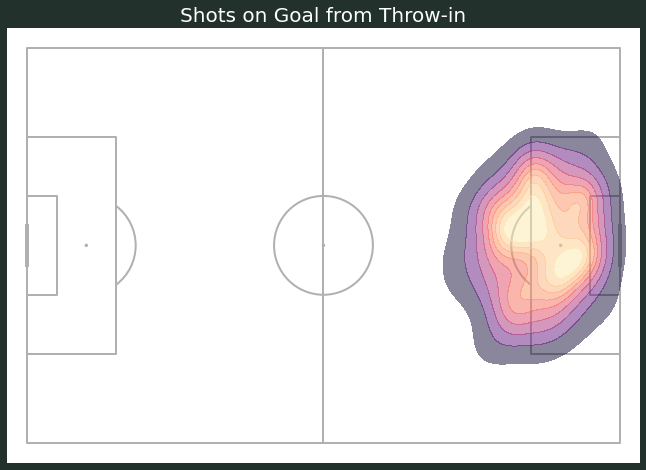

In [14]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb')

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#Create the heatmap
kde = sns.kdeplot(
        location_xy['x'],
        location_xy['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)
plt.title('Shots on Goal from Throw-in',color='white',size=20)